# Netflix Viewing Trends Analysis

### Step 1: Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('netflix_titles.csv')

In [3]:
# Print first 5 values
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Step 2: Preprocessing

In [5]:
# Clean and convert date_added column
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')

In [6]:
# Strip whitespace from column names and object-type columns
df.columns = df.columns.str.strip()
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

In [7]:
# Fill missing values
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)
df['duration'].fillna('Unknown', inplace=True)
df['date_added'].fillna(pd.Timestamp('2000-01-01'), inplace=True)

In [8]:
# Extract year
df['year_added'] = df['date_added'].dt.year

In [9]:
# Preview
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


### Distribution of Movies vs. TV Shows

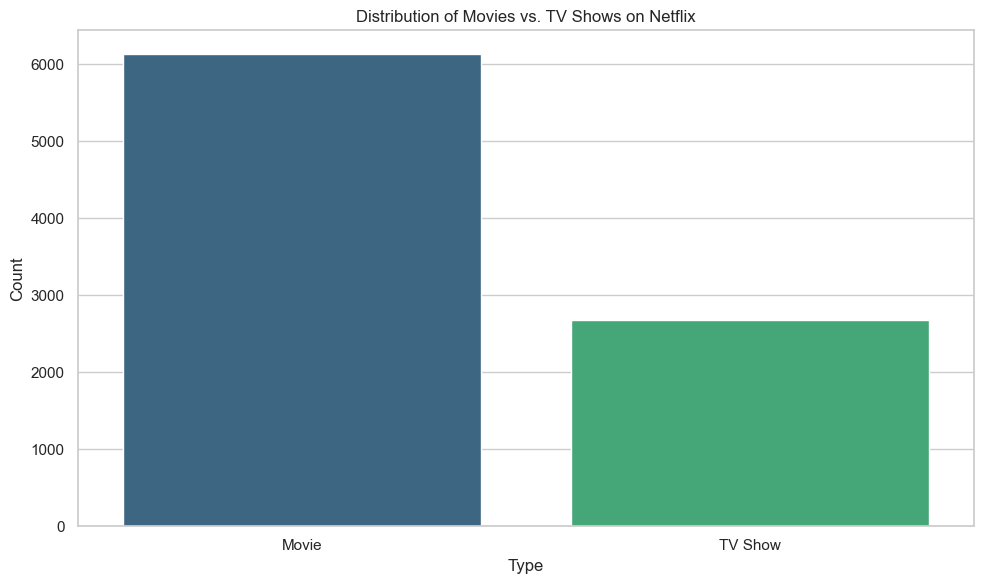

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
type_counts = df['type'].value_counts()
sns.barplot(x=type_counts.index, y=type_counts.values, palette="viridis")
plt.title("Distribution of Movies vs. TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Trends in Content Addition Over the Years

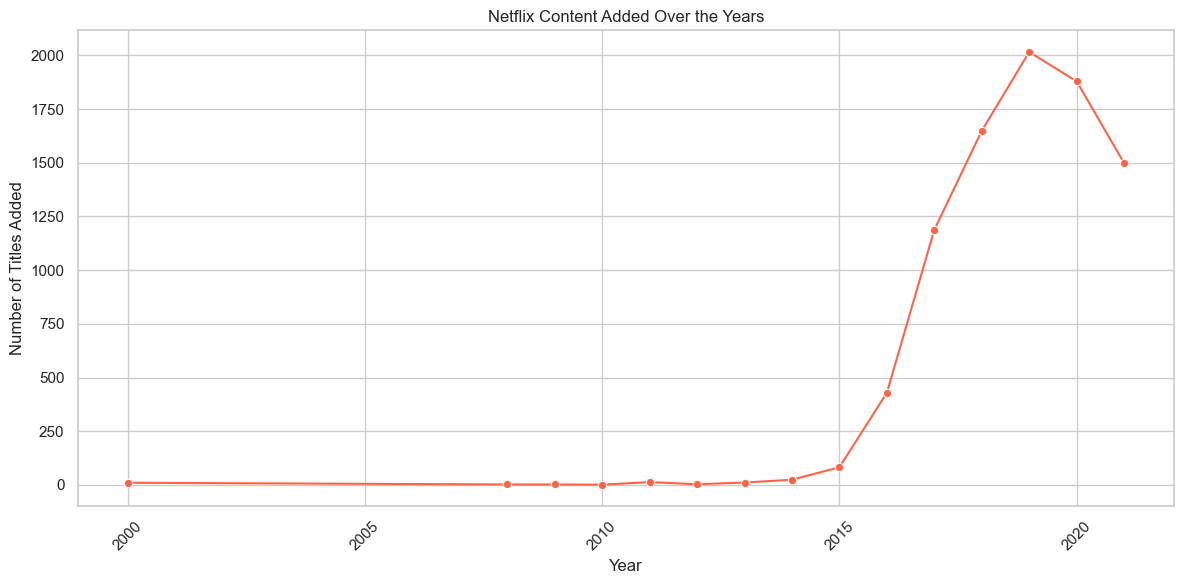

In [11]:
content_by_year = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=content_by_year.index, y=content_by_year.values, marker='o', color='tomato')
plt.title("Netflix Content Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Most Popular Genres

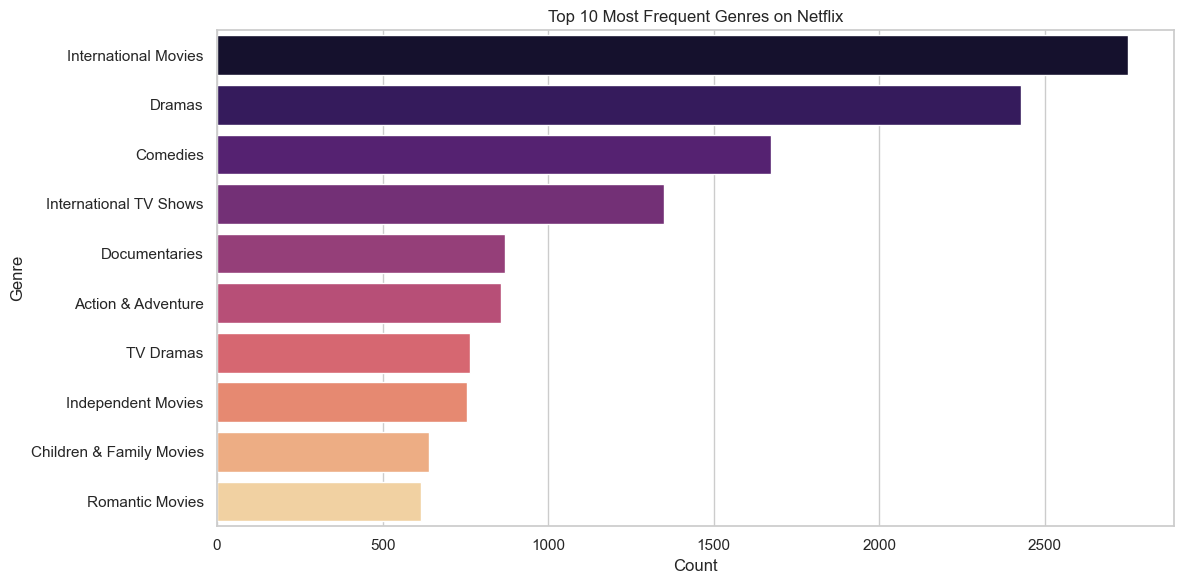

In [12]:
from collections import Counter

genre_series = df['listed_in'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
genre_counts = Counter([genre for sublist in genre_series for genre in sublist])

# Convert to DataFrame
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Plot top 10
plt.figure(figsize=(12,6))
sns.barplot(data=genre_df.head(10), x='Count', y='Genre', palette="magma")
plt.title("Top 10 Most Frequent Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

### Most Frequent Directors (excluding 'Unknown')

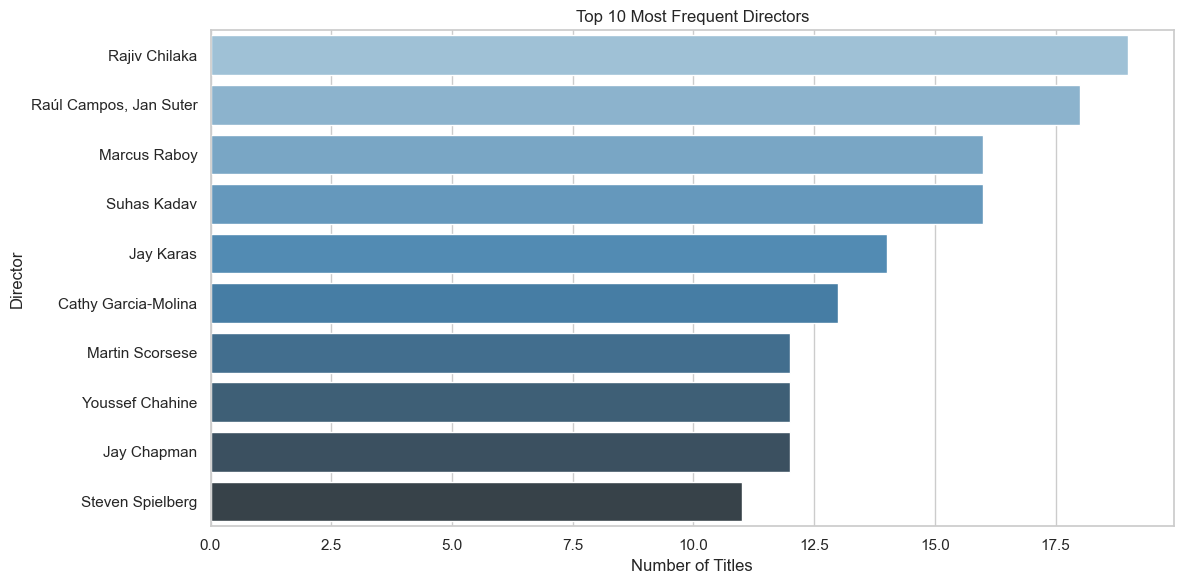

In [13]:
director_counts = df[df['director'] != 'Unknown']['director'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=director_counts.values, y=director_counts.index, palette="Blues_d")
plt.title("Top 10 Most Frequent Directors")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.tight_layout()
plt.show()

### Most Frequent Actors

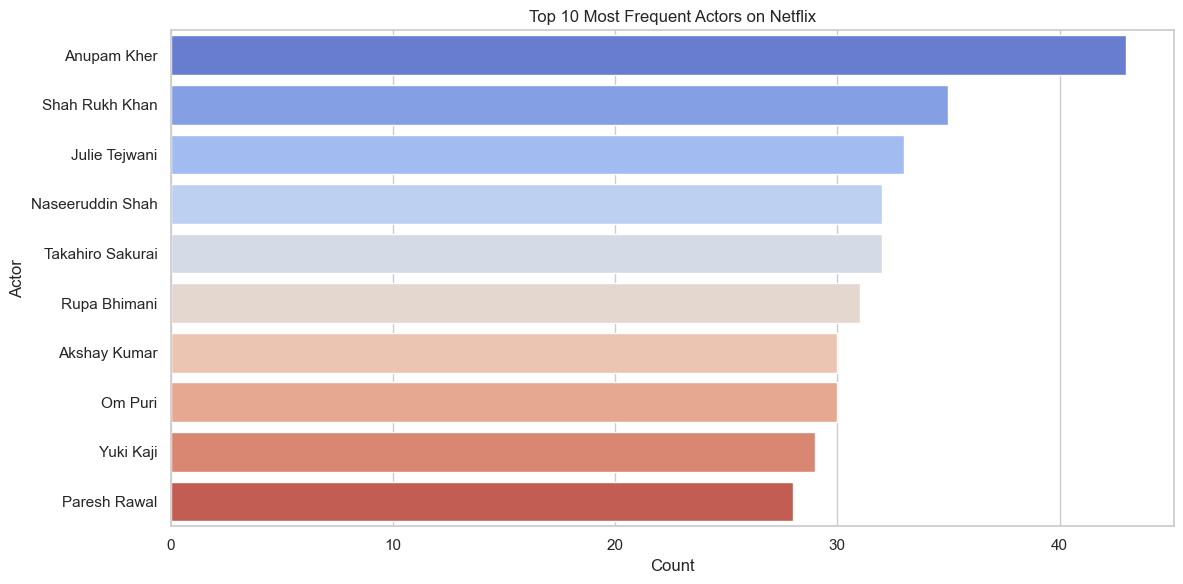

In [14]:
actor_series = df['cast'].dropna().apply(lambda x: [i.strip() for i in x.split(',') if i.strip() != 'Unknown'])
actor_counts = Counter([actor for sublist in actor_series for actor in sublist])

actor_df = pd.DataFrame(actor_counts.items(), columns=['Actor', 'Count']).sort_values(by='Count', ascending=False)

# Plot top 10 actors
plt.figure(figsize=(12,6))
sns.barplot(data=actor_df.head(10), x='Count', y='Actor', palette="coolwarm")
plt.title("Top 10 Most Frequent Actors on Netflix")
plt.xlabel("Count")
plt.ylabel("Actor")
plt.tight_layout()
plt.show()

### Content Ratings Distribution

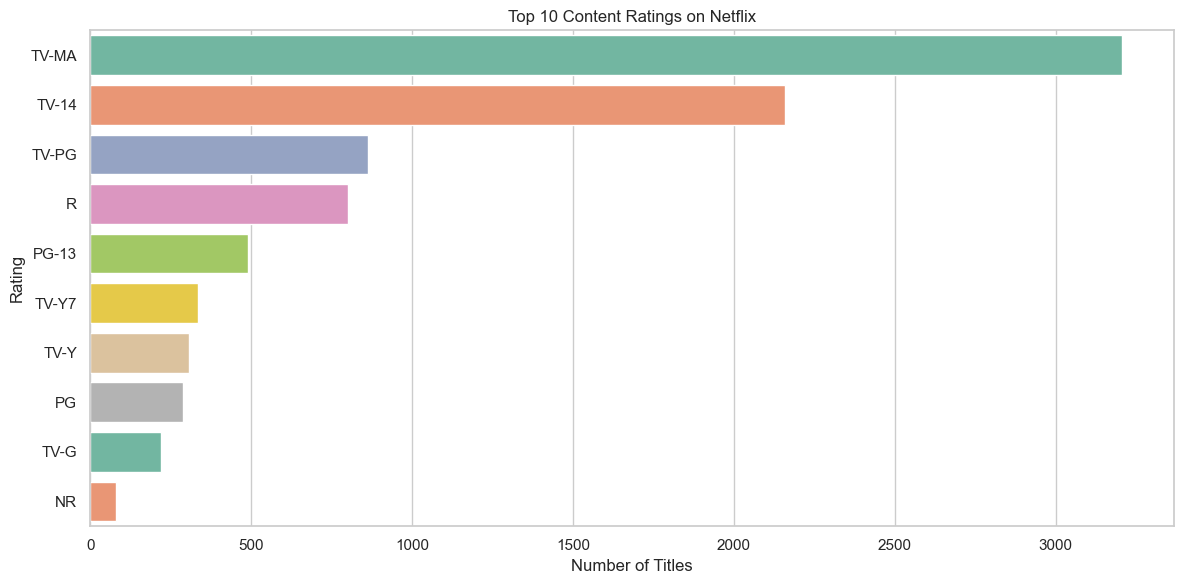

In [15]:
rating_counts = df['rating'].value_counts().sort_values(ascending=False)

# Plot top 10 ratings
plt.figure(figsize=(12,6))
sns.barplot(x=rating_counts.head(10).values, y=rating_counts.head(10).index, palette='Set2')
plt.title("Top 10 Content Ratings on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

### Patterns in Movie Durations

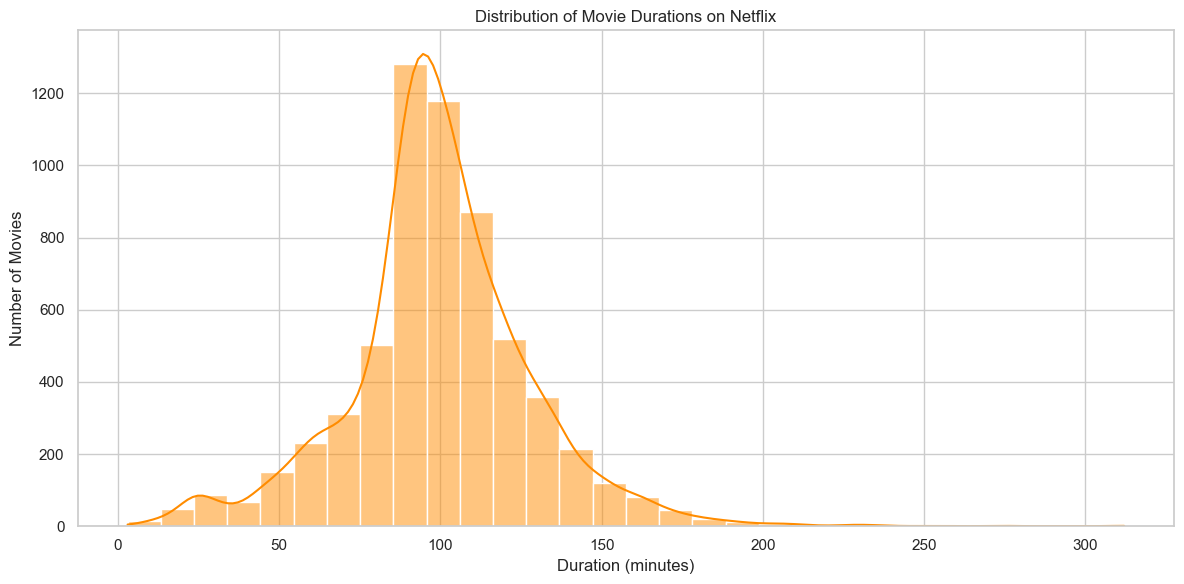

In [16]:
# Filter only movies
movies_df = df[df['type'] == 'Movie'].copy()

# Extract numeric duration (assume format like '90 min')
movies_df['duration_minutes'] = movies_df['duration'].str.extract(r'(\d+)').astype(float)

# Drop NaNs (if any) just in case
movies_df.dropna(subset=['duration_minutes'], inplace=True)

# Plot distribution
plt.figure(figsize=(12,6))
sns.histplot(movies_df['duration_minutes'], bins=30, kde=True, color='darkorange')
plt.title("Distribution of Movie Durations on Netflix")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()

### Top Content-Producing Countries

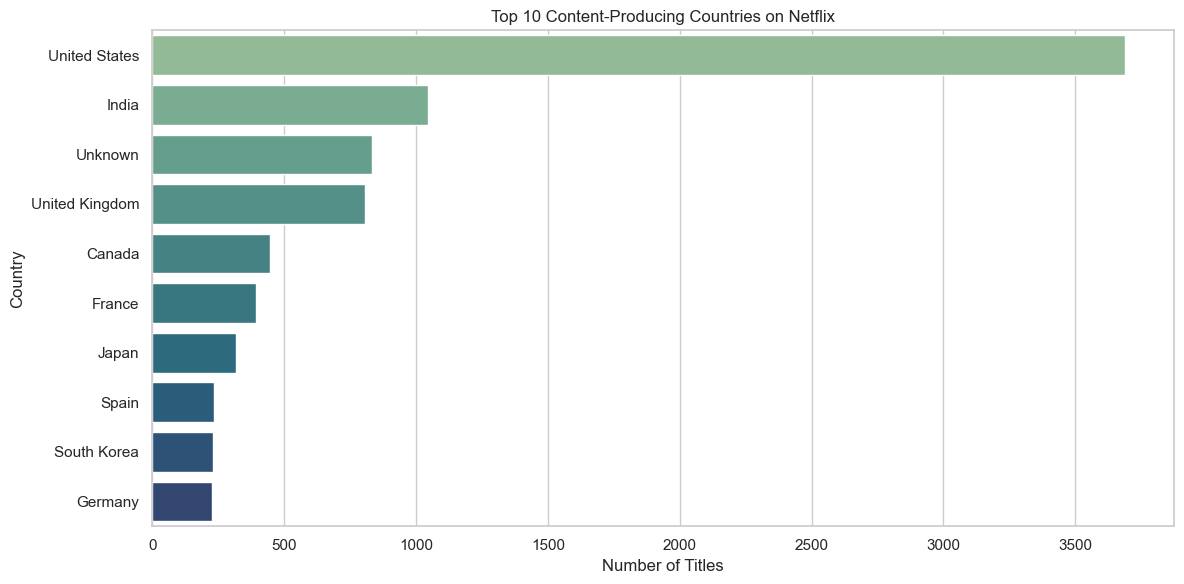

In [17]:
# Split multiple countries and count individually
from collections import Counter

country_series = df['country'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
country_counts = Counter([country for sublist in country_series for country in sublist])

# Convert to DataFrame
country_df = pd.DataFrame(country_counts.items(), columns=['Country', 'Count']).sort_values(by='Count', ascending=False)

# Plot top 10 countries
plt.figure(figsize=(12,6))
sns.barplot(data=country_df.head(10), x='Count', y='Country', palette='crest')
plt.title("Top 10 Content-Producing Countries on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

You've now got a full step-by-step Netflix content analysis in Jupyter Notebook form, covering:

✅ Data preprocessing

✅ Distribution of Movies vs. TV Shows

✅ Trends in content addition over years

✅ Popular genres, directors, and actors

✅ Content ratings and their distribution

✅ Patterns in movie durations

✅ Top content-producing countries